In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("academic_performance.csv")

In [4]:
print(df.head())

   Unnamed: 0  rollno name  marks grade
0           0       1    a   40.0     F
1           1       2    b   23.0     F
2           2       3    c   50.0     P
3           3       4    d   78.0     P
4           4       5    e   48.0     P


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0    0
rollno        0
name          2
marks         2
grade         2
dtype: int64


In [6]:
df.fillna({"name": "Unknown", "marks": df["marks"].mean(), "grade": "F"}, inplace=True)

In [7]:
# Remove rows where all values are missing
df.dropna(inplace=True)

In [8]:
print(df.describe())

       Unnamed: 0     rollno      marks
count   15.000000  15.000000  15.000000
mean     7.000000   8.000000  69.461538
std      4.472136   4.472136  21.522797
min      0.000000   1.000000  23.000000
25%      3.500000   4.500000  57.500000
50%      7.000000   8.000000  69.461538
75%     10.500000  11.500000  86.500000
max     14.000000  15.000000  97.000000


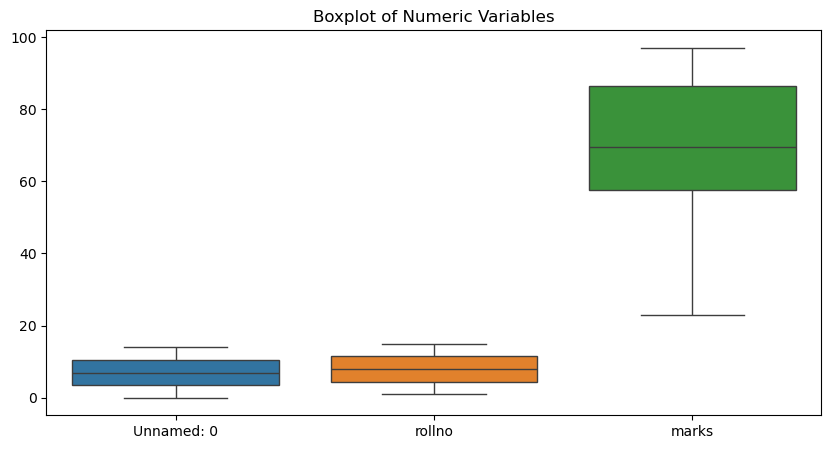

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot of Numeric Variables")
plt.show()

In [10]:
Q1 = df["marks"].quantile(0.25)
Q3 = df["marks"].quantile(0.75)
IQR = Q3 - Q1

In [11]:
df_cleaned = df[~((df["marks"] < (Q1 - 1.5 * IQR)) | (df["marks"] > (Q3 + 1.5 * IQR)))]

In [12]:
scaler = MinMaxScaler()

In [13]:
df_cleaned["marks_scaled"] = scaler.fit_transform(df_cleaned[["marks"]])

In [14]:
df_cleaned.to_csv("academic_performance_cleaned.csv", index=False)

In [15]:
print(df_cleaned.head())

   Unnamed: 0  rollno name  marks grade  marks_scaled
0           0       1    a   40.0     F      0.229730
1           1       2    b   23.0     F      0.000000
2           2       3    c   50.0     P      0.364865
3           3       4    d   78.0     P      0.743243
4           4       5    e   48.0     P      0.337838
